In [1]:
import torchvision
from torchvision.transforms import ToTensor
import torch

In [2]:
train_ds = torchvision.datasets.MNIST('data',
                                      train=True,
                                      transform=ToTensor(),
                                      download=True)

In [3]:
test_ds = torchvision.datasets.MNIST('data',
                                      train=False,
                                      transform=ToTensor(),
                                      download=True)

In [4]:
train_dl = torch.utils.data.DataLoader(train_ds, 
                                       batch_size=64,
                                       shuffle=True)

In [5]:
test_dl = torch.utils.data.DataLoader(test_ds, 
                                       batch_size=64)

In [6]:
imgs, labels = next(iter(train_dl))

In [7]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [8]:
import matplotlib.pyplot as plt
import numpy as np

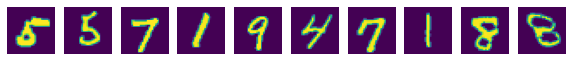

In [9]:
plt.figure(figsize=(10, 1))
for i, img in enumerate(imgs[:10]):
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.subplot(1, 10, i+1)
    plt.imshow(npimg)
    plt.axis('off')

In [10]:
labels[:10]

tensor([5, 5, 7, 1, 9, 4, 7, 1, 8, 8])

# 激活函数

In [11]:
# relu激活： f(x) = max(x, 0)

In [12]:
input = torch.randn(5)

In [13]:
input

tensor([ 0.9918,  0.5278,  0.2246, -1.3454,  0.1650])

In [14]:
torch.relu(input)

tensor([0.9918, 0.5278, 0.2246, 0.0000, 0.1650])

In [15]:
torch.sigmoid(input)

tensor([0.7294, 0.6290, 0.5559, 0.2066, 0.5412])

In [16]:
torch.tanh(input)

tensor([ 0.7581,  0.4837,  0.2209, -0.8730,  0.1635])

In [17]:
from torch import nn

In [18]:
nn.LeakyReLU(input)

LeakyReLU(negative_slope=tensor([ 0.9918,  0.5278,  0.2246, -1.3454,  0.1650]))

In [19]:
#创建多层感知器模型

In [20]:
from torch import nn

In [21]:
# nn.Linear() # 全连接层 要求输入的数据是一维   （batch, features）

In [22]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(28*28, 120)
        self.linear_2 = nn.Linear(120, 84)
        self.linear_3 = nn.Linear(84, 10)
    def forward(self, input):
        x = input.view(-1, 1*28*28)
        x = torch.relu(self.linear_1(x))
        x = torch.relu(self.linear_2(x))
        logits = self.linear_3(x)
        return logits    # 未激活的输出，叫做logits

In [23]:
#模型输出是C个可能值上概率， C表示类别总数  np.argmax（[0.1， 0.2， 0.8]）

#  logits                                 【5， 10， 40】

# 如何解析模型预测结果
import numpy as np

np.argmax([0.9, 0.04, 0.06])  

# torch.argamx

In [24]:
# 两个概率分布的计算： [0.9, 0.04, 0.06]     [0, 0, 1]

In [25]:
# 定义损失函数
loss_fn = torch.nn.CrossEntropyLoss()

#损失函数的输入：

loss_fn ： target ： 0，1，2、、、、  并不是独热编码的形式

           input： logits

In [26]:
# 优化： 根据计算得到的损失，调整模型参数，降低损失的过程  Adam、SGD

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Model().to(device)   # 初始化模型

In [28]:
opt = torch.optim.SGD(model.parameters(), lr=0.001)

# 编写训练循环

In [29]:
# 训练函数
def train(dl, model, loss_fn, optimizer):
    size = len(dl.dataset)    
    num_batches = len(dl)
        
    train_loss, correct = 0, 0
        
    for x, y in dl:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            train_loss += loss.item()
    correct /= size
    train_loss /= num_batches
    return correct, train_loss

In [30]:
# 测试函数
def test(test_dl, model, loss_fn):
    size = len(test_dl.dataset)    
    num_batches = len(test_dl)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in test_dl:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = loss_fn(pred, y)
            test_loss += loss.item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        correct /= size
        test_loss /= num_batches
        return correct, test_loss

In [31]:
# 训练50 个epoch， 每一个epoch代表将全部数据集训练一遍

In [33]:
epochs = 50
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_acc, epoch_loss = train(train_dl, model, loss_fn, opt)
    epoch_test_acc, epoch_test_loss = test(test_dl, model, loss_fn)
    train_acc.append(epoch_acc)
    train_loss.append(epoch_loss)
    test_acc.append(epoch_test_acc)
    test_loss.append(epoch_test_loss)
    
    template = ("epoch:{:2d}, train_Loss:{:.5f}, train_acc:{:.1f},test_Loss:{:.5f}, test_acc:{:.1f}")
    
    print(template.format(epoch, epoch_loss, epoch_acc*100, epoch_test_loss, epoch_test_acc*100))
print('Done')

epoch: 0, train_Loss:2.26532, train_acc:22.6,test_Loss:2.24497, test_acc:31.4
epoch: 1, train_Loss:2.21908, train_acc:40.9,test_Loss:2.18577, test_acc:47.0
epoch: 2, train_Loss:2.14184, train_acc:49.2,test_Loss:2.08323, test_acc:52.1
epoch: 3, train_Loss:2.00979, train_acc:53.7,test_Loss:1.91367, test_acc:55.8
epoch: 4, train_Loss:1.80388, train_acc:58.3,test_Loss:1.66454, test_acc:61.9
epoch: 5, train_Loss:1.52970, train_acc:64.7,test_Loss:1.36716, test_acc:69.1
epoch: 6, train_Loss:1.24585, train_acc:71.8,test_Loss:1.10310, test_acc:75.1
epoch: 7, train_Loss:1.01981, train_acc:77.2,test_Loss:0.91211, test_acc:79.3
epoch: 8, train_Loss:0.86152, train_acc:80.2,test_Loss:0.78138, test_acc:81.7
epoch: 9, train_Loss:0.75283, train_acc:82.0,test_Loss:0.69128, test_acc:83.2
epoch:10, train_Loss:0.67583, train_acc:83.1,test_Loss:0.62689, test_acc:84.3
epoch:11, train_Loss:0.62001, train_acc:84.0,test_Loss:0.57849, test_acc:85.0
epoch:12, train_Loss:0.57769, train_acc:84.8,test_Loss:0.54175, 

In [34]:
import matplotlib.pyplot as plt

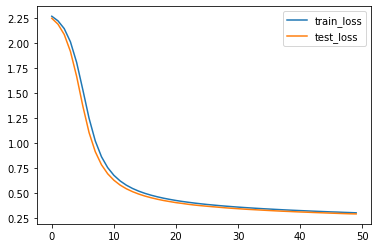

In [35]:
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), test_loss, label='test_loss')
plt.legend()

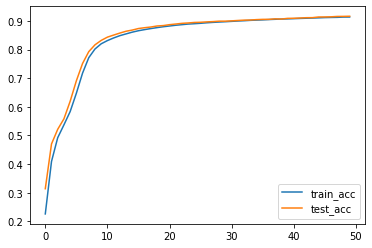

In [36]:
plt.plot(range(epochs), train_acc, label='train_acc')
plt.plot(range(epochs), test_acc, label='test_acc')
plt.legend()